In [109]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-white')
import timeit
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

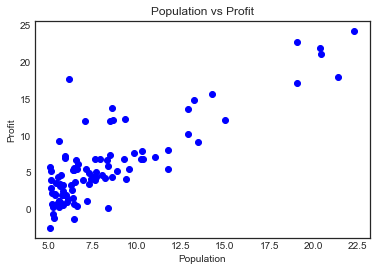

In [110]:
#Data Preparation and Visualization
source = pd.read_csv('q1.csv')
x = np.array(source['population']).reshape(-1,1)
y = np.array(source['profit']).reshape(-1,1)
# Convert 'x' into nx2 matrix 
ones = np.ones((x.shape[0],1))
X = np.hstack((ones,x))
plt.scatter(x,y,color = 'blue')
plt.title('Population vs Profit')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.savefig("Sctr_plt_q1.png")

Closed-form Solution gives :-
Intercept =  -3.9150842427308126
Slope =  1.1930336441895943
MSE = 4.476971375975179
Time Taken = 0.01367 seconds


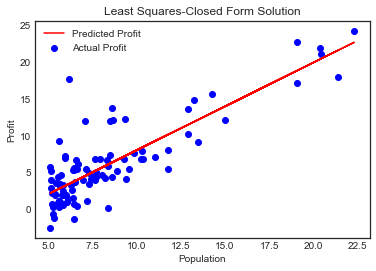

In [111]:
#Closed-form LMS Solution and predicted values of 'y'.
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_cform = np.dot(X,theta)
n = len(y)
cost_1 = (0.5/n)*np.sum(np.square(y_cform-y))
t_1 = timeit.timeit()
c_1 = theta.item(0)
m_1 = theta.item(1)
print("Closed-form Solution gives :-")
print("Intercept = ", c_1)
print("Slope = ", m_1)
print("MSE =",cost_1)
print("Time Taken =","{:.5f}".format(t_1),"seconds")
print("=========================")
plt.scatter(x,y,label = "Actual Profit",color ='blue')
plt.plot(x,y_cform,color = 'red',label='Predicted Profit')
plt.title('Least Squares-Closed Form Solution')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.savefig("lin_reg.png")

Batch GD LMS gives :-
Intercept =  -3.8590406875857317
Slope =  1.1874476282864326
MSE = 4.477252659230787
Time Taken = 0.01110 seconds
No. of Iterations: 2358


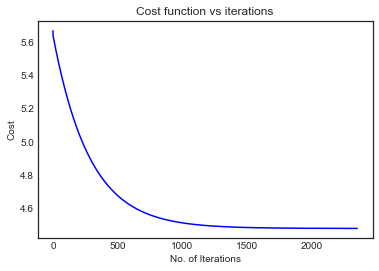

In [112]:
#Batch LMS using learning rate of 0.01 instead of 0.1
# convergence condition : error should be less than 1.e-6
#j_theta will store the cost function for later plots
#theta will have random values for the first iterations.
alpha = 0.01
n = len(y)
error = 1
i = 0
theta_n = np.random.randn(2,1)
j_theta = np.empty((1))
while error >1.e-6:
    y_hat = np.dot(X,theta_n)
    residual = y-y_hat
    theta_n = theta_n + ((1/n)*alpha*(X.T.dot((y-y_hat))))
    cost = (0.5/n)*np.sum(np.square(y-y_hat))
    j_theta = np.append(j_theta,cost)
    i = i+1
    error =  np.absolute(j_theta[i]-j_theta[i-1])   
t_2= timeit.timeit()
cost_2 = j_theta[i]
c_2 = theta_n.item(0)
m_2 = theta_n.item(1)
print("Batch GD LMS gives :-")
print("Intercept = ", c_2)
print("Slope = ", m_2)
print("MSE =",cost_2)
print("Time Taken =","{:.5f}".format(t_2),"seconds")
print("No. of Iterations:" ,i)

print("=========================")
plt.plot(j_theta[3:],color = 'blue',label='Cost function')
plt.title('Cost function vs iterations')
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.savefig("batch_cost.png")

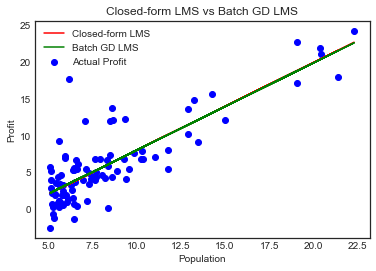

In [113]:
# plots showing comparison between Closed-form LMS and Batch GD LMS
y_gdesc = np.dot(X,theta_n)
plt.scatter(x,y,label = "Actual Profit",color ='blue')
plt.plot(x,y_cform,color = 'red',label='Closed-form LMS')
plt.plot(x,y_gdesc,color = 'green',label = 'Batch GD LMS')
plt.title('Closed-form LMS vs Batch GD LMS')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.savefig("linreg_v_batch.png")

Stochastic GD LMS gives :-
Intercept =  -2.9456365099712047
Slope =  1.0543634900288048
MSE = 4.630440350364714
Time Taken = 0.01072 seconds


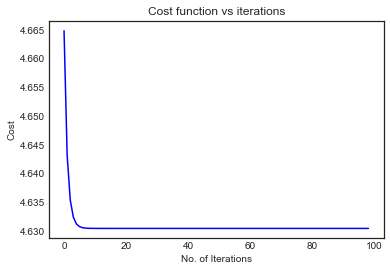

In [125]:
#Stochastic LMS using learning rate 0.01 and total number of sample points = n
#j_theta will store the cost function for later plots
#theta_ns will have random values for the first iterations.
# As number of samples is too less, the convergence is not happening satisfactorily for random values of theta.
# So, we need to intialize theta accordingly 
alpha = 0.01
n = len(y)
theta_ns = np.array([[-3],[1]])
# theta_ns = np.random.randn(2,1)
j_theta = np.empty((1))
count = 0
while count < 100 :
    for i in range(n):
        y_hat = np.dot(X,theta_ns)
        residual = y-y_hat
        gradient = (residual[i]*x[i])
        theta_ns = theta_ns+(1/n)*(alpha*gradient)
        cost = 0.5*np.square(residual).mean()
    j_theta = np.append(j_theta,cost)    
    count = count+1
t_3= timeit.timeit()
cost_3 = j_theta[count]
c_3 = theta_ns.item(0)
m_3 = theta_ns.item(1)    
print("Stochastic GD LMS gives :-")
print("Intercept = ", c_3)
print("Slope = ", m_3)
print("MSE =",cost_3)
print("Time Taken =","{:.5f}".format(t_3),"seconds")
print("=========================")

plt.plot(j_theta[2:],color = 'blue',label='Cost function')
plt.title('Cost function vs iterations')
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.savefig("stoch-cost.png")

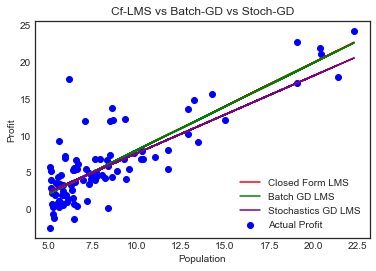

In [115]:
# plots showing comparison between Closed-form LMS,Batch GD LMS and Stochastic GD LMS
y_stoc = np.dot(X,theta_ns)
plt.scatter(x,y,label = "Actual Profit",color ='blue')
plt.plot(x,y_cform,color = 'red',label='Closed Form LMS')
plt.plot(x,y_gdesc,color = 'green',label = 'Batch GD LMS')
plt.plot(x,y_stoc,color = 'purple',label = 'Stochastics GD LMS')
plt.title('Cf-LMS vs Batch-GD vs Stoch-GD')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.savefig("lr_bch_stoch.png")

In [116]:
# Locally Weighted Linear Regression
x_query = 7.576
tau = 0.5
distance = (x-x_query)**2
weight = np.exp(-(distance)/(2*tau**2))
alpha = 0.01
n = len(y)
theta_w = np.array([[-3],[1]])
# theta_ns = np.random.randn(2,1)
j_theta = np.empty((1))
count = 0
while count < 5:
    for i in range(n):
        y_hat = np.dot(X,theta_w)
        residual = y-y_hat
        gradient = (weight[i]*residual[i])*(x[i])
        theta_w = theta_w+(1/n)*(alpha*gradient)
        cost = 0.5*np.square(residual).mean()
    j_theta = np.append(j_theta,cost)    
    count = count+1
t_4= timeit.timeit()
cost_4 = j_theta[count]
c_4 = theta_w.item(0)
m_4 = theta_w.item(1)
print("Locally weighted stochastic LMS gives :-")
print("Intercept = ", c_4)
print("Slope = ", m_4)
print("MSE =",cost_4)
print("Time Taken =","{:.5f}".format(t_4),"seconds")
print("=========================")

Locally weighted stochastic LMS gives :-
Intercept =  -2.9773598194925075
Slope =  1.0226401805074927
MSE = 4.8024393086163855
Time Taken = 0.01075 seconds


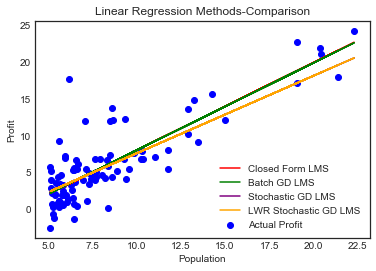

In [117]:
# plots showing comparison between various linear regression methods
y_low = np.dot(X,theta_w)
plt.scatter(x,y,label = "Actual Profit",color ='blue')
plt.plot(x,y_cform,color = 'red',label='Closed Form LMS')
plt.plot(x,y_gdesc,color = 'green',label = 'Batch GD LMS')
plt.plot(x,y_stoc,color = 'purple',label = 'Stochastic GD LMS')
plt.plot(x,y_stoc,color = 'orange',label = 'LWR Stochastic GD LMS')
plt.title('Linear Regression Methods-Comparison')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.savefig("comparison.png")

Ridge Regression gives :-
Intercept =  [-3.91165835]
Slope =  [[1.19261888]]
MSE = 4.476972650870759
Time Taken = 0.01088 seconds


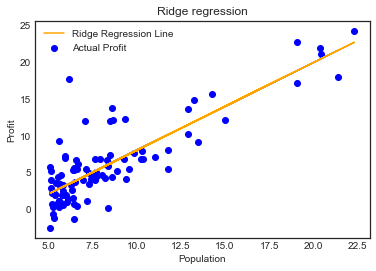

In [118]:
ridgereg = Ridge(alpha=0.5,normalize=False)
ridgereg.fit(x,y)
y_ridge = ridgereg.predict(x)
theta_r = np.array([[ridgereg.intercept_],[ridgereg.coef_]])
t_5= timeit.timeit()
cost_5 = mse(y_ridge,y)/2
c_5 = ridgereg.intercept_
m_5 = ridgereg.coef_
print("Ridge Regression gives :-")
print("Intercept = ", c_5)
print("Slope = ", m_5)
print("MSE =",cost_5)
print("Time Taken =","{:.5f}".format(t_5),"seconds")
print("=========================")
plt.scatter(x,y,label = "Actual Profit",color ='blue')
plt.plot(x,y_ridge,color = 'orange',label = 'Ridge Regression Line')
plt.title('Ridge regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.savefig("ridge_reg.png")

Lasso Regression gives :-
Intercept =  [-3.63644374]
Slope =  [1.15929911]
MSE = 4.485405009510194
Time Taken = 0.01109 seconds


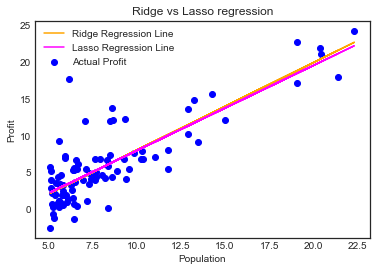

In [128]:
lassoreg = Lasso(alpha=0.5,normalize=False)
lassoreg.fit(x,y)
y_lasso = lassoreg.predict(x)
t_6= timeit.timeit()
cost_6 = mse(y_lasso,y)/2
c_6 = lassoreg.intercept_
m_6 = lassoreg.coef_
print("Lasso Regression gives :-")
print("Intercept = ", c_6)
print("Slope = ", m_6)
print("MSE =",cost_6)
print("Time Taken =","{:.5f}".format(t_6),"seconds")
print("=========================")
plt.scatter(x,y,label = "Actual Profit",color ='blue')
plt.plot(x,y_ridge,color = 'orange',label = 'Ridge Regression Line')
plt.plot(x,y_lasso,color = 'magenta',label = 'Lasso Regression Line')
plt.title('Ridge vs Lasso regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.savefig("lasso_reg.png")

Elastic Regression gives :-
Intercept =  [-3.61461828]
Slope =  [1.15665674]
MSE = 4.48677793819175
Time Taken = 0.02056 seconds


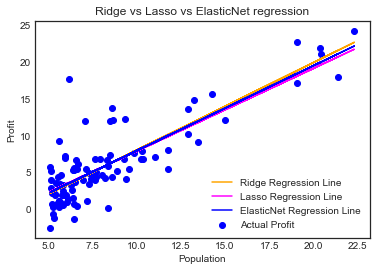

In [127]:
elasticreg = ElasticNet(alpha=0.5,l1_ratio=0.,random_state=0,normalize=False)
elasticreg.fit(x,y)
y_elastic = elasticreg.predict(x)
t_7= timeit.timeit()
cost_7 = mse(y_elastic,y)/2
c_7 = elasticreg.intercept_
m_7 = elasticreg.coef_
print("Elastic Regression gives :-")
print("Intercept = ", c_7)
print("Slope = ", m_7)
print("MSE =",cost_7)
print("Time Taken =","{:.5f}".format(t_7),"seconds")
print("=========================")
plt.scatter(x,y,label = "Actual Profit",color ='blue')
plt.plot(x,y_ridge,color = 'orange',label = 'Ridge Regression Line')
plt.plot(x,y_lasso,color = 'magenta',label = 'Lasso Regression Line')
plt.plot(x,y_elastic,color = 'blue',label = 'ElasticNet Regression Line')
plt.title('Ridge vs Lasso vs ElasticNet regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.savefig("elastic-reg.png")

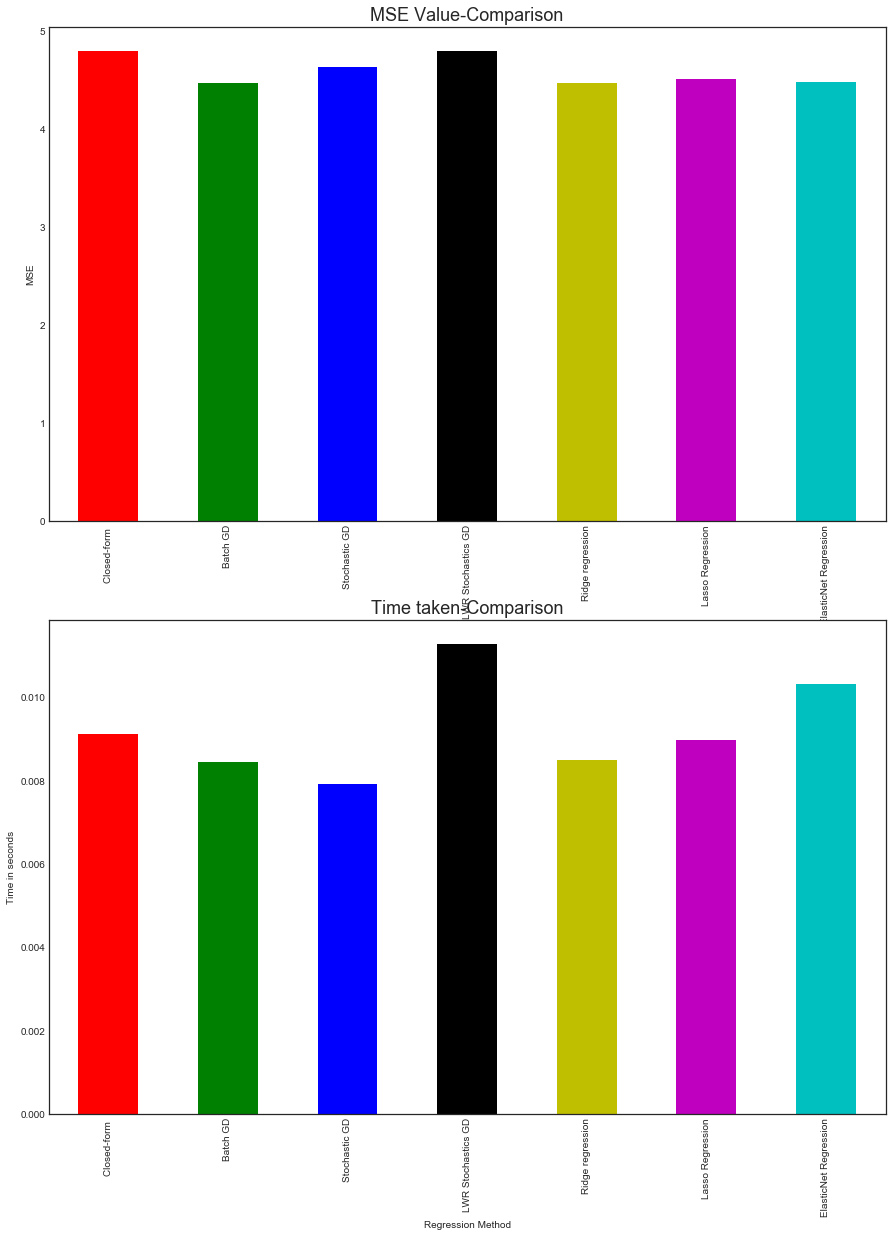

In [124]:
comparison = pd.read_csv('comparison_results.csv')
fig, axs = plt.subplots(2,1,figsize=(15,20))
comparison.iloc[2,1:].plot(kind='bar',color = list('rgbkymc'),ax=axs[0])
comparison.iloc[3,1:].plot(kind='bar',color = list('rgbkymc'),ax=axs[1])
axs[0].set(xlabel="Regression Method", ylabel="MSE")
axs[0].set_title("MSE Value-Comparison", fontsize=18)
axs[1].set_title("Time taken-Comparison", fontsize=18)
axs[1].set(xlabel="Regression Method", ylabel="Time"" in seconds")
plt.savefig("comparison-reg.png")

